# Pokemon Data Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
raw_data = pd.read_csv('../datasets/Pokemon.csv')

In [4]:
data = raw_data.copy()

In [5]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Drop columns Type 2

In [6]:
data = data.drop(columns = {'Type 2'})

In [7]:
data

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


# Rename Type 1 to Main Type

In [8]:
data = data.rename(columns = {'Type 1': 'Type'})
data

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


# Grouping Pokemon based on their Generation

In [9]:
grouped_data_generation = data.groupby('Generation')

# Data Manipulation

##### Categorizing Pokemon based on their total base stats and legendary status

In [10]:
base_total_below_350= data[(data.Total <= 350)]
data_total_above_350 = data[(data.Total > 350)]
data_lengendary_pokemon = data[(data.Legendary == True)]

#### Sorting out data based on Pokemon Attributes

In [11]:
sorted_attack = data.sort_values(by='Attack')
sorted_defense = data.sort_values(by='Defense')
sorted_hp = data.sort_values(by='HP')
sorted_speed = data.sort_values(by='Speed')
sorted_total = data.sort_values(by='Total')

# Descriptive Statistics

### Grouped Data Statistics

In [12]:
grouped_stats = grouped_data_generation.describe()
pd.set_option('display.max_columns', None)
grouped_stats

#                                                              \
            count        mean        std    min     25%    50%     75%    max   
Generation                                                                      
1           166.0   75.819277  45.153246    1.0   36.25   76.5  115.00  151.0   
2           106.0  202.283019  28.769612  152.0  178.25  203.5  226.75  251.0   
3           160.0  321.968750  40.581221  252.0  287.75  321.5  358.25  386.0   
4           121.0  442.446281  31.250053  387.0  415.00  444.0  471.00  493.0   
5           165.0  574.272727  46.516108  494.0  534.00  574.0  615.00  649.0   
6            82.0  688.012195  21.291912  650.0  670.25  688.5  708.75  721.0   

            Total                                                              \
            count        mean         std    min    25%    50%     75%    max   
Generation                                                                      
1           166.0  426.813253  115.878076  195.0  325.0  436.5  500.00  780.0   
2           106.0  418.283019  120.114133  180.0  330.0  422.5  500.00  700.0   
3           160.0  436.225000  136.314193  190.0  310.0  435.0  530.00  780.0   
4           121.0  459.016529  119.556541  194.0  350.0  485.0  530.00  720.0   
5           165.0  434.987879  108.117934  255.0  328.0  465.0  505.00  700.0   
6            82.0  436.378049  114.952340  200.0  335.0  464.0  512.25  700.0   

               HP                                                         \
            count       mean        std   min    25%   50%    75%    max   
Generation                                                                 
1           166.0  65.819277  28.153968  10.0  46.50  62.0  80.00  250.0   
2           106.0  71.207547  30.589359  20.0  51.25  70.0  88.75  255.0   
3           160.0  66.543750  24.059634   1.0  50.00  65.0  80.00  170.0   
4           121.0  73.082645  25.113604  20.0  55.00  70.0  85.00  150.0   
5           165.0  71.787879  22.407748  30.0  55.00  70.0  85.00  165.0   
6            82.0  68.268293  20.907822  38.0  53.25  65.0  80.00  126.0   

           Attack                                                          \
            count       mean        std   min    25%   50%     75%    max   
Generation                                                                  
1           166.0  76.638554  30.744727   5.0  55.00  75.0   95.00  190.0   
2           106.0  72.028302  32.708658  10.0  50.00  73.5   90.00  185.0   
3           160.0  81.625000  36.593767  15.0  54.00  75.0  100.00  180.0   
4           121.0  82.867769  32.780569   5.0  62.00  80.0  103.00  170.0   
5           165.0  82.066667  30.365685  25.0  55.00  80.0  103.00  170.0   
6            82.0  75.804878  29.179495  22.0  53.25  69.5   94.25  160.0   

           Defense                                                         \
             count       mean        std   min    25%   50%    75%    max   
Generation                                                                  
1            166.0  70.861446  28.641336   5.0  50.00  66.0   85.0  180.0   
2            106.0  73.386792  39.233749  10.0  45.75  70.0   90.0  230.0   
3            160.0  74.100000  35.222599  20.0  50.00  67.5   90.0  230.0   
4            121.0  78.132231  30.145741   5.0  51.00  72.0  105.0  168.0   
5            165.0  72.327273  23.318883  30.0  55.00  70.0   90.0  145.0   
6             82.0  76.682927  31.370301  33.0  55.50  70.0   89.5  184.0   

           Sp. Atk                                                         \
             count       mean        std   min   25%   50%     75%    max   
Generation                                                                  
1            166.0  71.819277  34.439106  15.0  45.0  65.0   95.00  194.0   
2            106.0  65.943396  27.814977  10.0  40.0  65.0   84.50  165.0   
3            160.0  75.806250  35.407510  10.0  50.0  70.0   95.00  180.0   
4            121.0  7

##### Here we can see the statistical results of all columns together.

### Descriptive Stats based on specified columns

In [13]:
based_on_HP = ['HP']

In [14]:
stats_HP = grouped_data_generation[based_on_HP].describe()
stats_HP

HP                                                       
            count       mean        std   min    25%   50%    75%    max
Generation                                                              
1           166.0  65.819277  28.153968  10.0  46.50  62.0  80.00  250.0
2           106.0  71.207547  30.589359  20.0  51.25  70.0  88.75  255.0
3           160.0  66.543750  24.059634   1.0  50.00  65.0  80.00  170.0
4           121.0  73.082645  25.113604  20.0  55.00  70.0  85.00  150.0
5           165.0  71.787879  22.407748  30.0  55.00  70.0  85.00  165.0
6            82.0  68.268293  20.907822  38.0  53.25  65.0  80.00  126.0

##### The statistical results for the HP categorized based on the Pokemon's Generation. We can see in Generation 1, the average HP is 65.8 with standard deviation of around 28.1, minimum HP of 10, and maximum HP of 250. In Generation 2, the average HP is 71.2 with standard deviation of 30.5, minimum HP of 20, and maximum of 255. In Generation 3, the average HP is 66.5 with standard deviation of 24.0, minimum of 1, and maximum of 170. In Generation 4, the average HP is 73.0 with std of 25.1, minimum HP of 20, and maximum of 150. In Generation 5, the average value of HP is 71.7 with standard deviation of 22.4, minimum of 30, and maximum HP of 165. In Generation 6, the average HP is 68.2 with std of 20.9, minimum of 38, and maximum of 125. Based on these results, Generation 4 has the best average HP of 73.0, while Generatioin 6 has the best standard deviation and minimum HP meaning that the HP data for Generation 6 is spread out evenly with fewer extreme outliers, and the lowest Pokemon has a starting HP of 38, highest amongst the Generation. However, for late games, Pokemon in Generation are the strongest with their maximum HP of 255 which is the highest compared to the other Generation.

In [15]:
basics = ['Attack', 'Defense', 'Speed']

In [16]:
base_stats = grouped_data_generation[basics].describe()
pd.set_option('display.max_columns', None)
base_stats

Attack                                                          \
            count       mean        std   min    25%   50%     75%    max   
Generation                                                                  
1           166.0  76.638554  30.744727   5.0  55.00  75.0   95.00  190.0   
2           106.0  72.028302  32.708658  10.0  50.00  73.5   90.00  185.0   
3           160.0  81.625000  36.593767  15.0  54.00  75.0  100.00  180.0   
4           121.0  82.867769  32.780569   5.0  62.00  80.0  103.00  170.0   
5           165.0  82.066667  30.365685  25.0  55.00  80.0  103.00  170.0   
6            82.0  75.804878  29.179495  22.0  53.25  69.5   94.25  160.0   

           Defense                                                         \
             count       mean        std   min    25%   50%    75%    max   
Generation                                                                  
1            166.0  70.861446  28.641336   5.0  50.00  66.0   85.0  180.0   
2            106.0  73.386792  39.233749  10.0  45.75  70.0   90.0  230.0   
3            160.0  74.100000  35.222599  20.0  50.00  67.5   90.0  230.0   
4            121.0  78.132231  30.145741   5.0  51.00  72.0  105.0  168.0   
5            165.0  72.327273  23.318883  30.0  55.00  70.0   90.0  145.0   
6             82.0  76.682927  31.370301  33.0  55.50  70.0   89.5  184.0   

            Speed                                                         
            count       mean        std   min    25%   50%    75%    max  
Generation                                                                
1           166.0  72.584337  29.675857  15.0  50.00  70.0  92.25  150.0  
2           106.0  61.811321  27.263132   5.0  40.00  60.5  85.00  130.0  
3           160.0  66.925000  31.331972  10.0  47.25  65.0  86.25  180.0  
4           121.0  71.338843  28.475005   5.0  46.00  77.0  91.00  135.0  
5           165.0  68.078788  28.726632  10.0  45.00  65.0  95.00  145.0  
6            82.0  66.439024  25.691954  23.0  48.25  60.0  80.00  126.0

#### Attack Stats
##### Statistical results of the Pokemon's Attack. In Generation 1, the average attack is 76.6 with standard deviation of 30.7, and minimum of 5 making it one of the lowest starting attack points out of all the generations. In Generation 2, the average attack is 72.0 with standard deviation of 32.7, and minimum of 10. In Generation 3, the average attack value is 81.6 with standard deviation of 36.5, and minimum of 15. In Generation 4, the average value is 82.6 with std of 32.7, and minimum of 5, the second lowest attack points out of all generations. In Generation 5, the average attack is 82.0 with standard deviation of 30.3, and minimum of 25. In Generation 6, the average attack value is 75.8 with std of 29.1, and minimum of 22. 
##### Based on these results, we can see that Generation 4 has the highest average attack value of 82.8 based on 121 Pokemon counts. The standard deviation amongst Generations are somewhat evenly spread apart from Generation 3 with the highest standard deviation of 36.5 based on 160 data counts. Now, the best Pokemon Generation with the minimum/starting attack is Generation 5, having the highest minimum attack of 25 based on 165 data counts.

#### Defense Stats
##### The Statitical results of Pokemon's Defense shows that in Generation 1, the average defense is 70.8 with standard deviation of 28.6, minimum of 5, and maximum of 180. In Generation 2, the average value is 73.3 with standard deviation of 39.2, minimum of 10, and maximum of 230. In Generation 3, the average value is 74.1 with standard deviation of 35.2, minimum of 20, and maximum of 230. In Generation 4, the average value is 78.1 with standard deviation fo 30.1, minimumm of 5, and maximum of 168. In Generation 5, the average value is 72.3 with standard deviation of 23.3, minimum of 30, and maximum of 145. In Generation 6, the average value is 76.6 with standard deviation of 31.3, minimum of 33, and maximum of 184. 
##### Based on these results, Generation 4 Pokemon have the highest average Defense value, making them to be generally defensive with standard deviation evenly spread compared to Generation 2 with the highest standard deviation value, meaning that the data for Generation 4 has fewer extreme outliers while having the highest average Defense value. However, Generation 4 & 1 have the lowest starting Defense points among all generations. The best starting Defense is Generation 6, having the highest minimum Defense point among all the generations. The best late game situation the best  Defense is Generation 2 & 3 with the highest possible Defense points.

#### Speed Stats
##### The Statistical results of Pokemon's Speed. In Generation 1, the average value is 72.5 with std of 29.6, minimum of 15, and maximum of 150. In Generation 2, the average is 61.8 with std of 27.2, minimum  of 5, and maximum of 130. In Generation 3, the average is 66.9 with std of 31.3, minimum of 10, and maximum of 180. In Generation 4, the average is 71.3 with std of 28.4, minimum of 5, and maximum of 135. In Generation 5, the average is 68.0 with std of 28.7, minimum of 10, and maximum of 145. In Generation 6, the average is 66.4 with std of 25.6, minimum of 23, and maximum of 126. 
##### Based on these results, Generation 1 have the highest average Speed value, making the Pokemon in Generation 1 to be the fastest Pokemon with std lower than Generation 2. The generation with the lowest/fewer extreme outlier is Generation 6 among all the generations. The best starting speed point is Generation 6 with the highest minimum value. The best late game situation for speed is Generation 3 with the highest maximum value.

In [17]:
specials = ['Sp. Atk', 'Sp. Def']

In [18]:
special_stats = grouped_data_generation[specials].describe()
special_stats

Sp. Atk                                                         \
             count       mean        std   min   25%   50%     75%    max   
Generation                                                                  
1            166.0  71.819277  34.439106  15.0  45.0  65.0   95.00  194.0   
2            106.0  65.943396  27.814977  10.0  40.0  65.0   84.50  165.0   
3            160.0  75.806250  35.407510  10.0  50.0  70.0   95.00  180.0   
4            121.0  76.404959  31.907047  10.0  54.0  71.0  100.00  150.0   
5            165.0  71.987879  31.889097  15.0  45.0  65.0   95.00  170.0   
6             82.0  74.292683  31.790785  27.0  50.0  65.0   95.25  170.0   

           Sp. Def                                                        
             count       mean        std   min   25%   50%    75%    max  
Generation                                                                
1            166.0  69.090361  25.505275  20.0  50.0  70.0   85.0  130.0  
2            106.0  73.905660  31.534268  20.0  55.0  65.0   95.0  230.0  
3            160.0  71.225000  31.039628  20.0  50.0  65.0   87.0  200.0  
4            121.0  77.190083  27.498883  30.0  55.0  75.0  100.0  150.0  
5            165.0  68.739394  22.388721  25.0  50.0  65.0   85.0  135.0  
6             82.0  74.890244  30.086298  25.0  55.0  70.5   89.0  154.0

#### Sp. Attack Stats
##### The Stat results for Special Attack. In Generation 1, the average value is 71.8 with std of 34.4, minimum of 15. In Generation 2, the average value is 65.9 with std of 27.8, minimum of 10, and maximum of 165. In Generation 3, the avg. is 75.8 with std of 35.4, minimum of 10, and maximum of 180. In Generation 4, the avg is 76.4 with std of 31.9, minimum of 10, and maximum of 150. In Generation 5, the avg is 71.9 with std of 31.8, minimum of 15, and maximum of 170. In Generation 6, the avg is 74.2 with std of 31.7, minimum of 27, and maximum of 170.
##### Based on these results, we can see that Generation 4 has the highest average Special Attack, but the best Generation with standard devation is Generation 2 with the lowest std. There are three generations with the lowest starting Special Attack: Gen 2, Gen 3, and Gen 4, while the best starting Special Attack is Generation 6. Generation 1 has the most potential with the highest maximum value for Special Attack.

#### Sp. Defense Stats
##### The Stat results for Special Defense. In Generation 1, the avg is 69.0 with std of 25.5, minimum of 20, and maximum of 130. In Generation 2, the avg value is 73.9 with std of 31.5, minimum of 20, and maximum of 230. In Generation 3, the avg value is 71.2 with std of 31.0, minimum of 20, and maximum  of 200. In Generation 4, the avg value is 77.1 with std of 27.4, minimum of 30, and maximum of 150. In Generation 5, the avg value is 68.7 with std of 22.3, minimum of 25, and maximum of 135. In Generation 6, the avg value is 74.8 with std of 30.0, minimum of 25, and maximum of 154. 
##### Based on these results, the highest average value is 77.1 which is Generation 4 but the lowest standard deviation is Generation 5 where there are fewer extreme outliers. The best starting Special Defense is tied between Generation 5 & 6. The best potential Special Defense is Generation 2 having the highest maximum value.

# Visualizations

### Count plot of Type Distribution

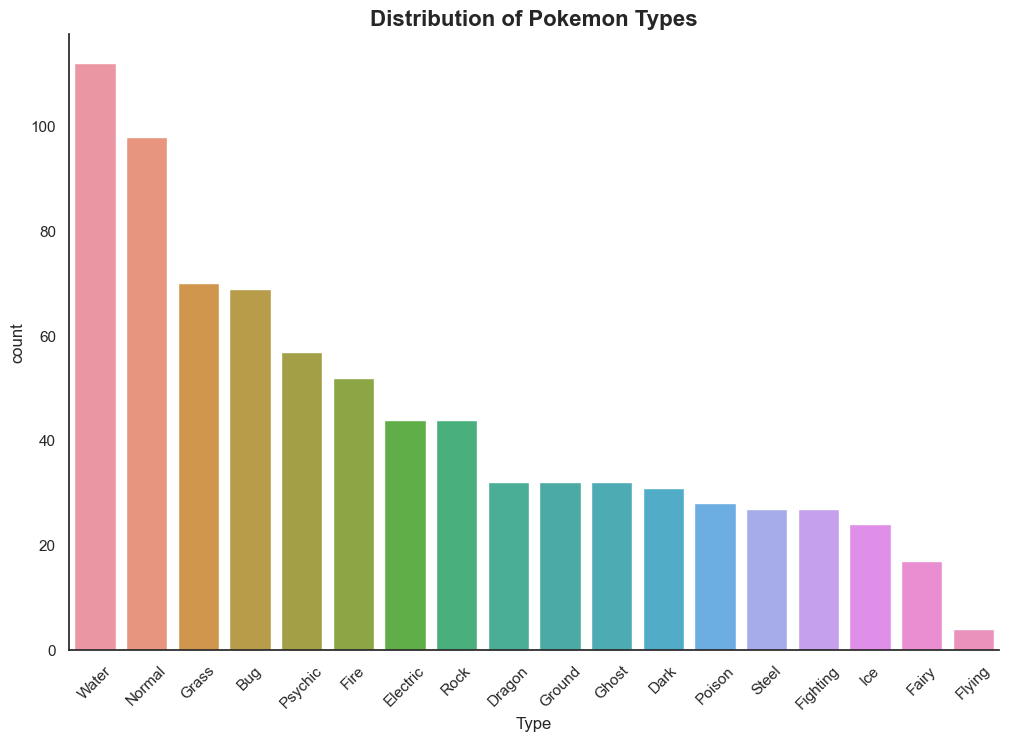

In [19]:
sns.set_style('white')
plt.figure(figsize = (12, 8))
sns.countplot(data = data, x = 'Type', order = data['Type'].value_counts().index)
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### The plot above shows the distribution of Pokemon Types of all Generations. We can see that there are a lot of Water Type Pokemon, followed by Normal, then Grass. The lowest Pokemon Type is Flying. Based on this graph we can see what is the most common type of Pokemons, however, I wanted to go further by plotting the Pokemon types based on the Generation.

#### Distribution of Pokemon Types based on their Generations

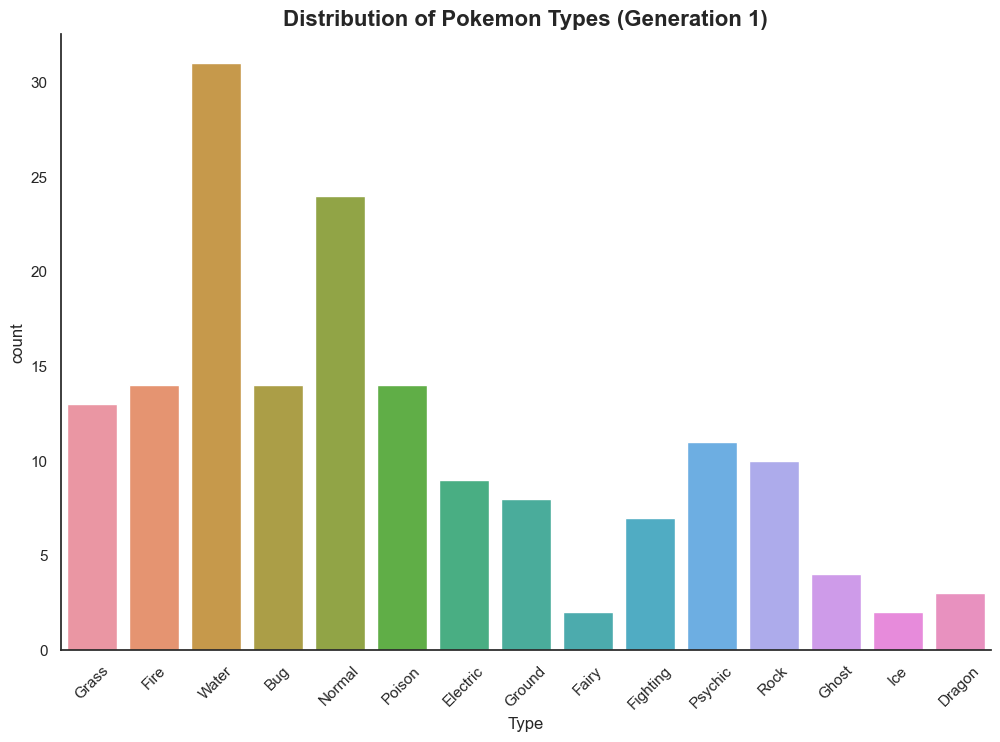

In [20]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 1)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 1)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 1. In Gen 1, we can see that the majority of the Pokemon Type is Water, then followed by Normal, these twos are the outlier from Gen 1 data where the other types are generally are spread out evenly. The lowest type of Pokemons are Fairy, Ice, Dragon and Ghost. 

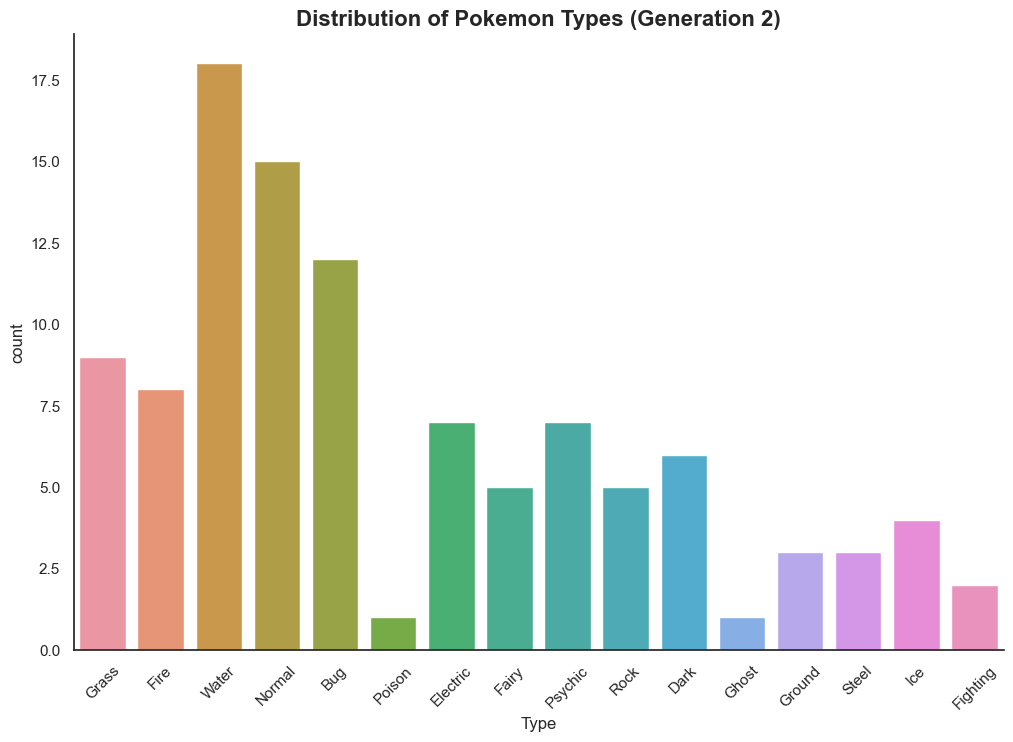

In [21]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 2)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 2)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 2. In Gen 2, we can see that the majority of the Pokemon Type is similar to Gen 1 where majority of its Water, and Normal and followed by another type Bug. However, for the lowest type is different, Poision type is now the lowest type followed by Ghost.

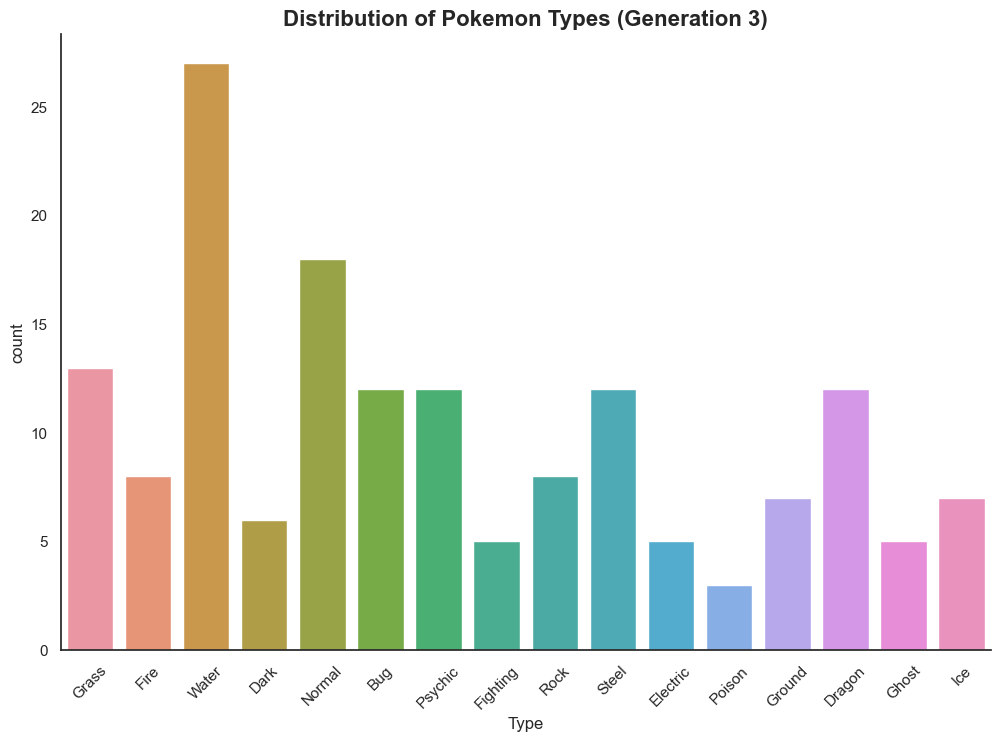

In [22]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 3)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 3)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 3. In Gen 3, we can see that the majority of the Pokemon Type is Water, then followed by Normal, then there is Grass, and 4 types tied Bug, Psychic, Steel and Dragon. The lowest Pokemon Type in Gen 3 is Poison.

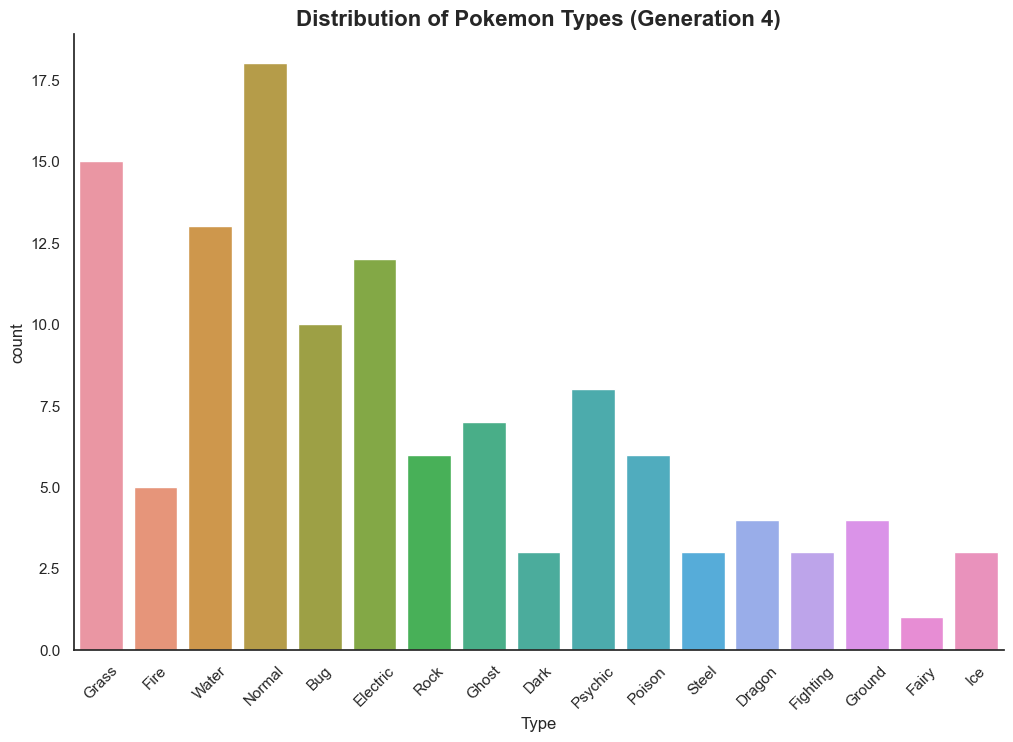

In [23]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 4)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 4)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 4. In Gen 4, we can see the majority type changed, now the majority Pokemon Type is Normal followed by Grass Type, then Water. The lowest Pokemon Type is Fairy.

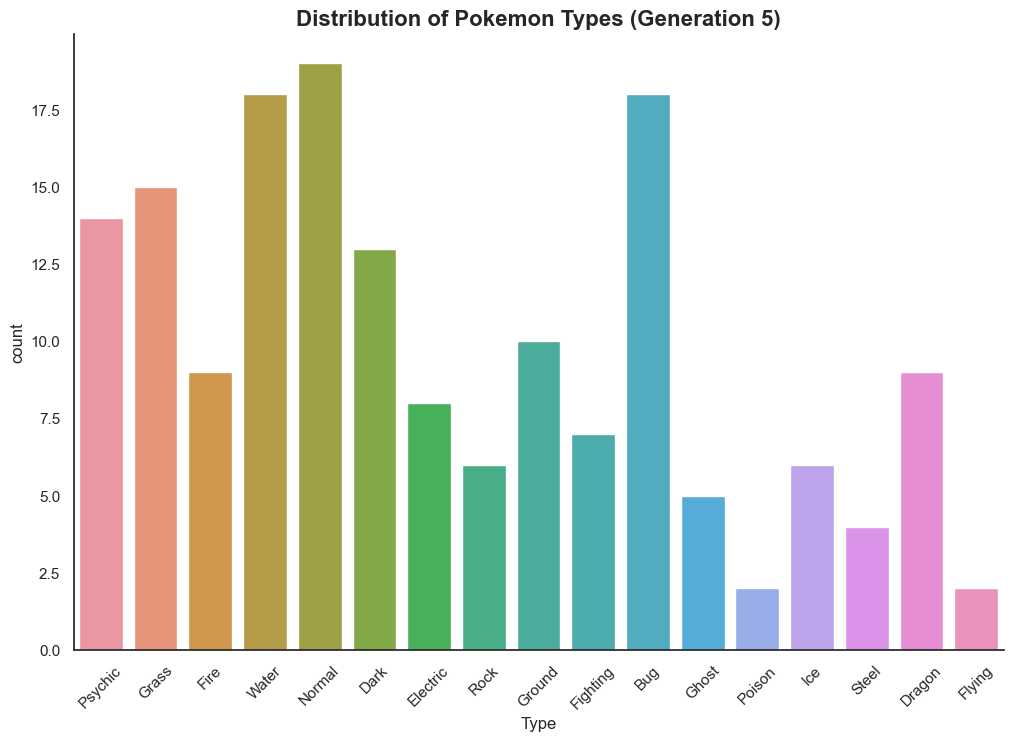

In [24]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 5)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 5)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 5. In Gen 5, we can see that the majority of the Pokemon Type is Normal, then followed by Water and Bug. In Gen 5, we can see an introduction of a new type which is Flying, and a Type that is taken out which is Fairy.

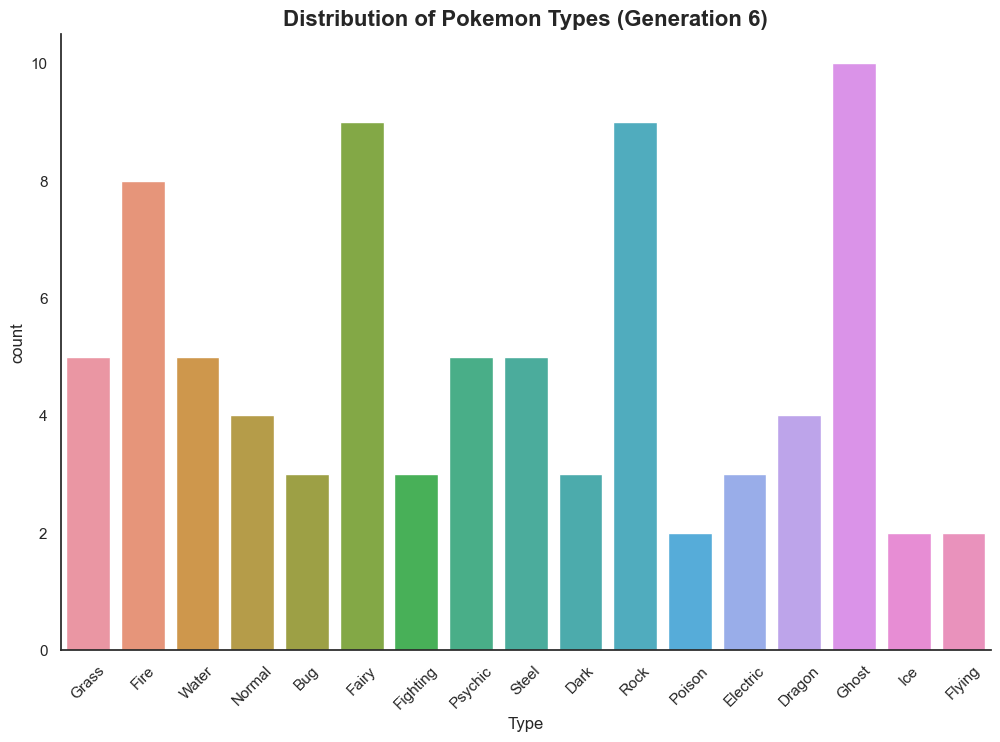

In [25]:
plt.figure(figsize = (12,8))
sns.countplot(data = data[(data.Generation == 6)], x = 'Type')
plt.xticks(rotation = 45)
plt.title('Distribution of Pokemon Types (Generation 6)', fontsize = 16, weight = 'bold')
sns.despine()
plt.show()

##### This plot shows the distribution of Pokemon Types from Generation 6. In Gen 6, we can see that the majority of the Pokemon Type is Ghost, then followed by fairy and Rock Type. The lowest Pokemon Types are Poison, Ice and Flying.

### Histogram of Attribute Distributions

#### Histogram for HP Distribution

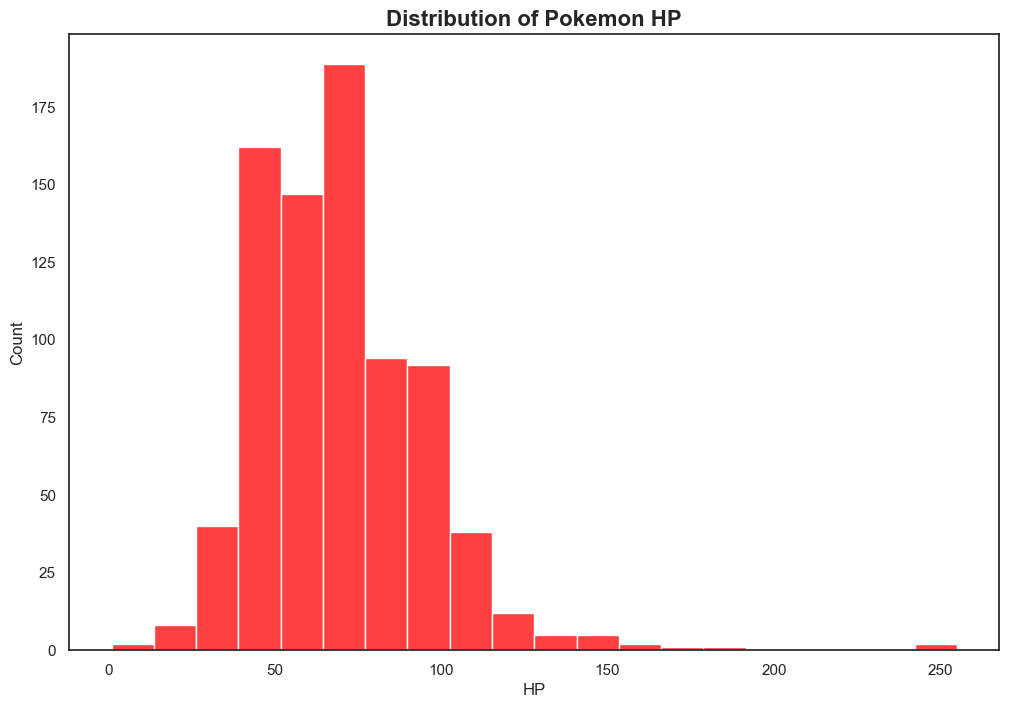

In [26]:
plt.figure(figsize = (12,8))
sns.histplot(data = data, x = 'HP', bins = 20, color = 'Red')
plt.title('Distribution of Pokemon HP', fontsize = 16, weight = 'bold')
plt.show()

#### The Histogram shows the distribution of Pokemon's HP. We can see that the range of HP is between 30 and 100, and where majority of it sits between 50 and 100.

#### Histogram of Attack Distribution

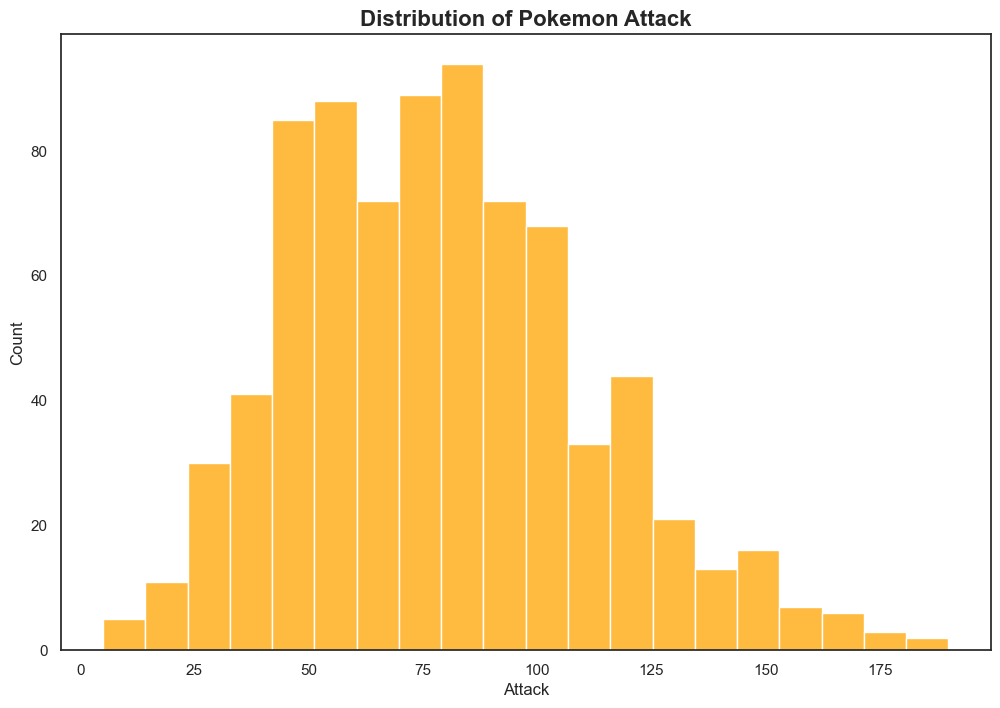

In [27]:
plt.figure(figsize = (12,8))
sns.histplot(data = data, x = 'Attack', bins = 20, color = 'Orange')
plt.title('Distribution of Pokemon Attack', fontsize = 16, weight = 'bold')
plt.show()

##### The Histogram shows that the range of Pokemon Attack is between 25 and 125

#### Histrogram of Defense Distribution

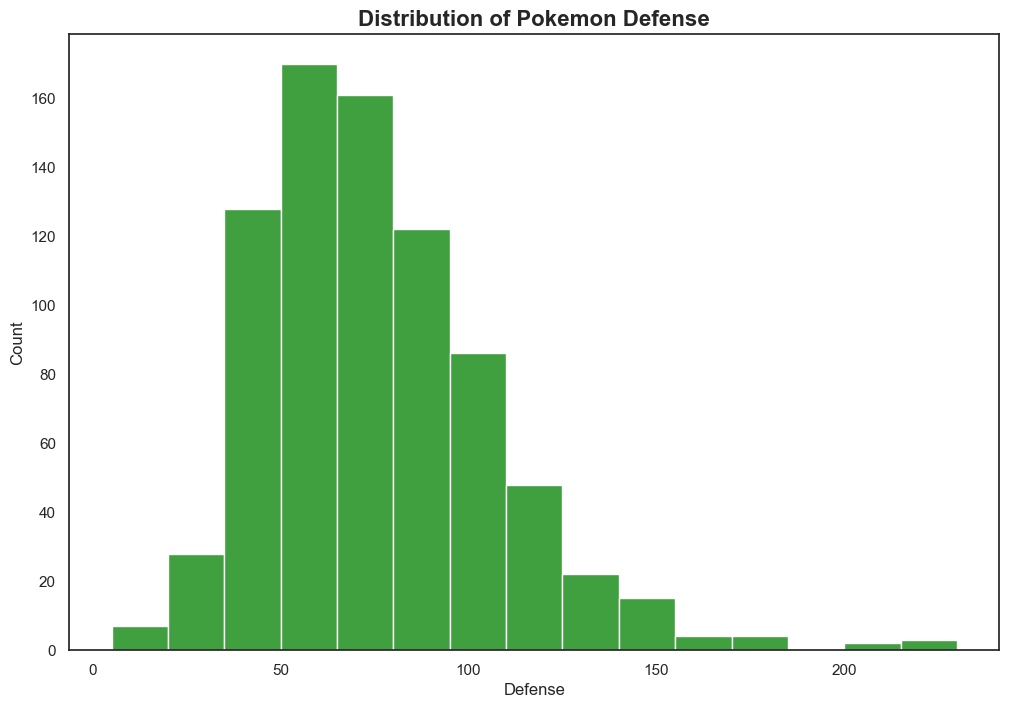

In [28]:
plt.figure(figsize = (12,8))
sns.histplot(data = data, x = 'Defense', bins = 15, color = 'Green')
plt.title('Distribution of Pokemon Defense', fontsize = 16, weight = 'bold')
plt.show()

##### The Histogram shows that the range of Pokemon Defense is between 25 and 150

#### Histogram of Speed Distribution

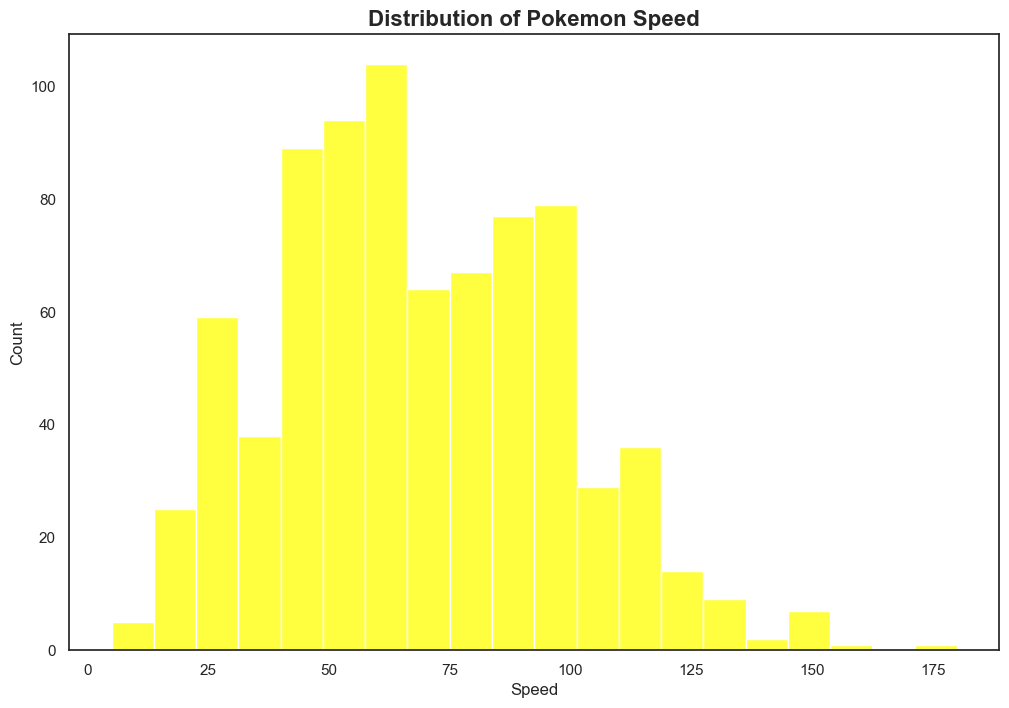

In [29]:
plt.figure(figsize = (12,8))
sns.histplot(data = data, x = 'Speed', bins = 20, color = 'Yellow')
plt.title('Distribution of Pokemon Speed', fontsize = 16, weight = 'bold')
plt.show()

##### The Histogram shows that the range of Pokemon Attack is between 25 and 125

### Bar graph showcasing the relationship of Pokemons

Text(0.5, 1.0, 'Average Total by Pokemon Type')

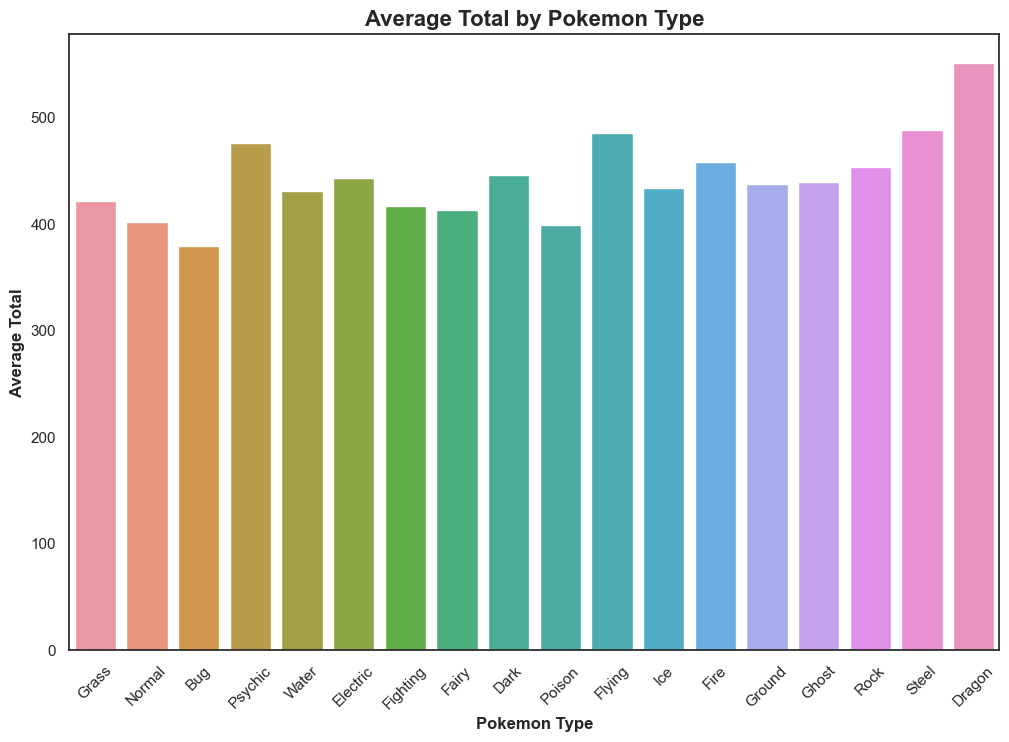

In [38]:
plt.figure(figsize = (12, 8))
sns.barplot(data = sorted_total, x = 'Type', y = 'Total', errorbar = None)
plt.ylabel('Average Total', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Total by Pokemon Type', fontsize = 16, weight = 'bold')

##### The Bar graph shows that the best Pokemon Type with base total stats is the Dragon Type, followed by Psychic and Flying type Pokemons.

Text(0.5, 1.0, 'Average HP by Pokemon Type')

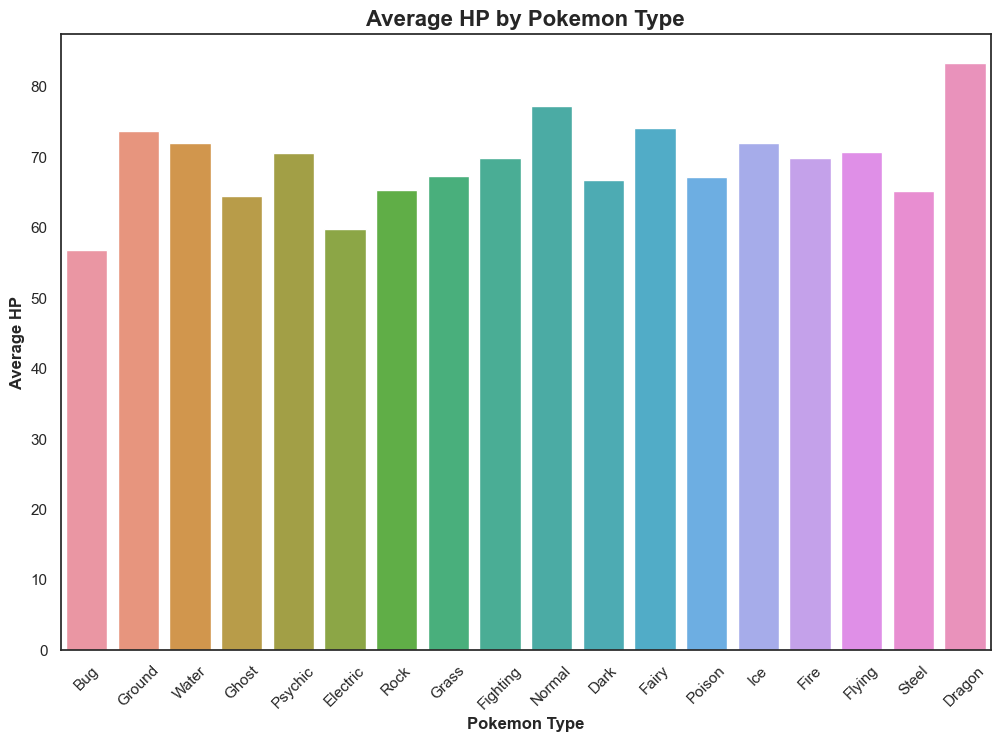

In [30]:
plt.figure(figsize = (12, 8))
sns.barplot(data = sorted_hp, x = 'Type', y = 'HP', errorbar = None)
plt.ylabel('Average HP', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average HP by Pokemon Type', fontsize = 16, weight = 'bold')

##### The bar graph showcase the best HP Pokemon based on their Types. In this case, the best type for HP is the Dragon Type, followed by the Normal Type Pokemons.

Text(0.5, 1.0, 'Average Attack by Pokemon Type')

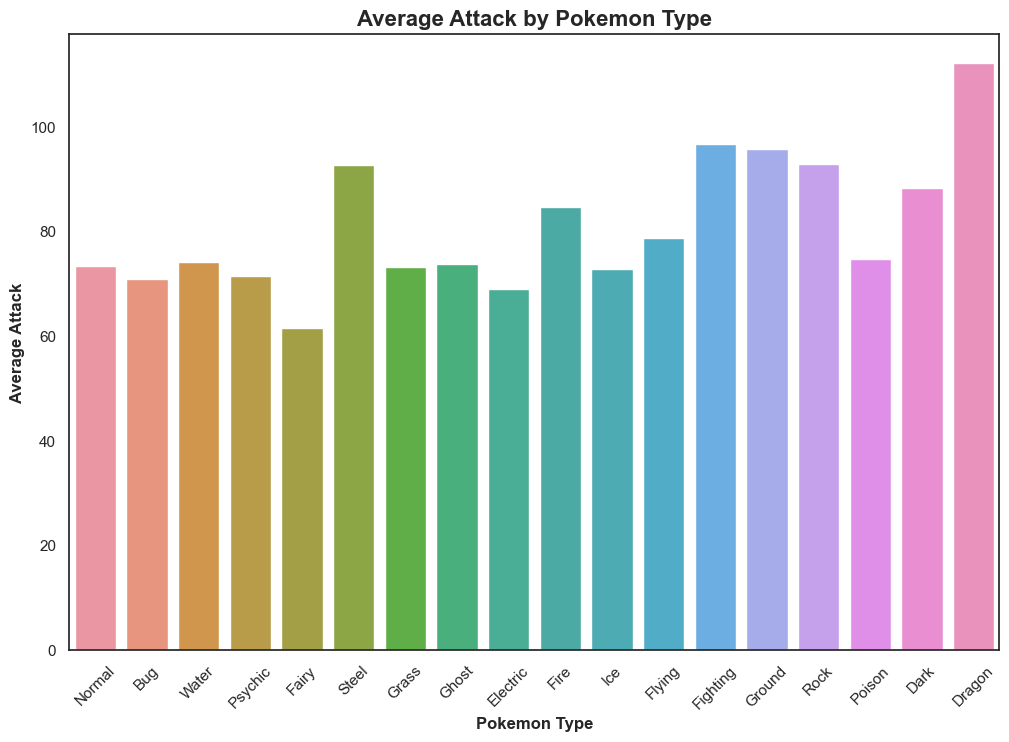

In [31]:
plt.figure(figsize = (12, 8))
sns.barplot(data = sorted_attack, x = 'Type', y = 'Attack', errorbar = None)
plt.ylabel('Average Attack', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Attack by Pokemon Type', fontsize = 16, weight = 'bold')

##### The Bar graph shows that the best Pokemon to use Attacking wise is the Dragon Type, second the Fighting Type and followed by two Types Steel and Ground.

Text(0.5, 1.0, 'Average Defense by Pokemon Type')

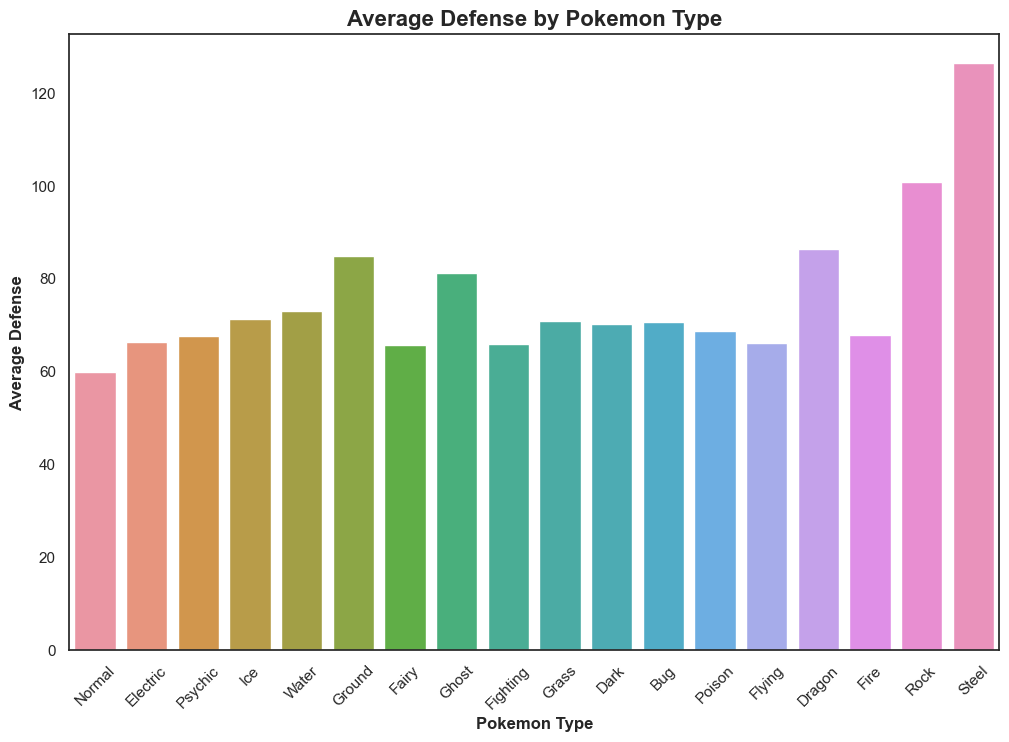

In [32]:
plt.figure(figsize = (12, 8))
sns.barplot(data = sorted_defense, x = 'Type', y = 'Defense', errorbar = None)
plt.ylabel('Average Defense', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Defense by Pokemon Type', fontsize = 16, weight = 'bold')

##### The Bar graph showcase that the best Pokemon Type to use for Defense is Steel Type, which make senses as they are probably made out steel making them very durable in battle. Then, following Steel Type is Rock Type, they are not as strong or durable but the Rock Types are still should be considered.

Text(0.5, 1.0, 'Average Speed by Pokemon Type')

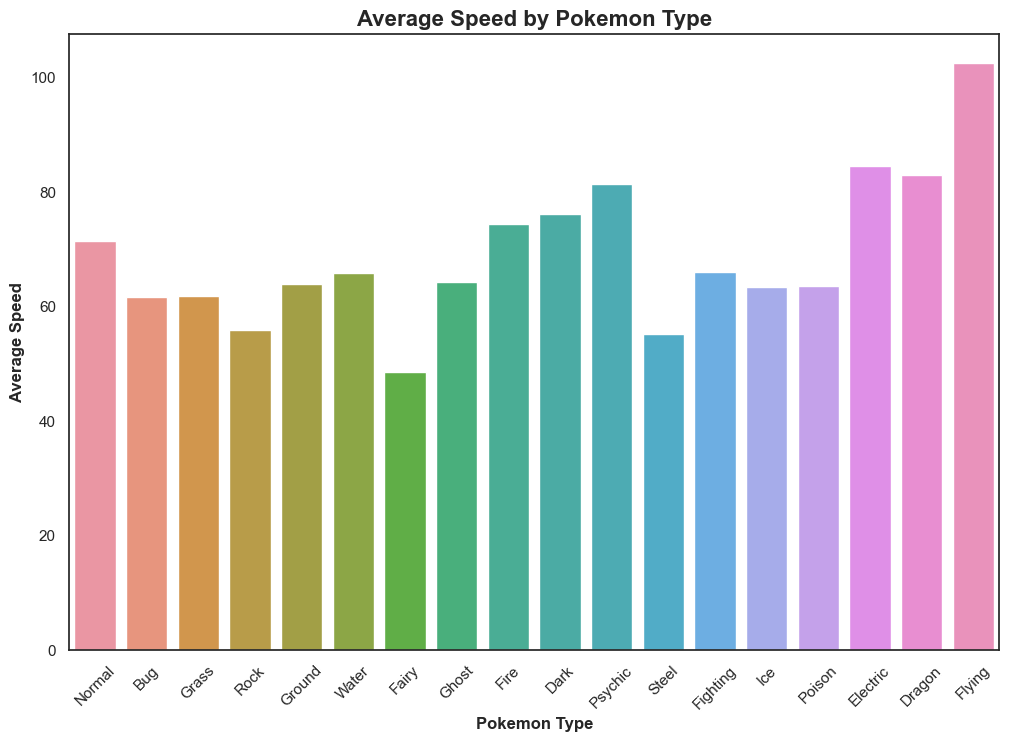

In [37]:
plt.figure(figsize = (12, 8))
sns.barplot(data = sorted_speed, x = 'Type', y = 'Speed', errorbar = None)
plt.ylabel('Average Speed', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Speed by Pokemon Type', fontsize = 16, weight = 'bold')

##### The Bar graph shows that the best Pokemon for Speed is Flying type, which make senses as they could evade enemy attack by flying in the air. Then, there is the Electric Type, they can use their shock power to electrocute the enemy slowing the enemy's attack granting them the ability to evade. In third place is Psychic Type, their ability to hypnotize, or hallucinate enemy slowing the opponent which in return making the enemy to miss their attack.

### Relationship of Legendary Pokemons and Attributes

Text(0.5, 1.0, 'Average Base Total by Legendary Pokemon')

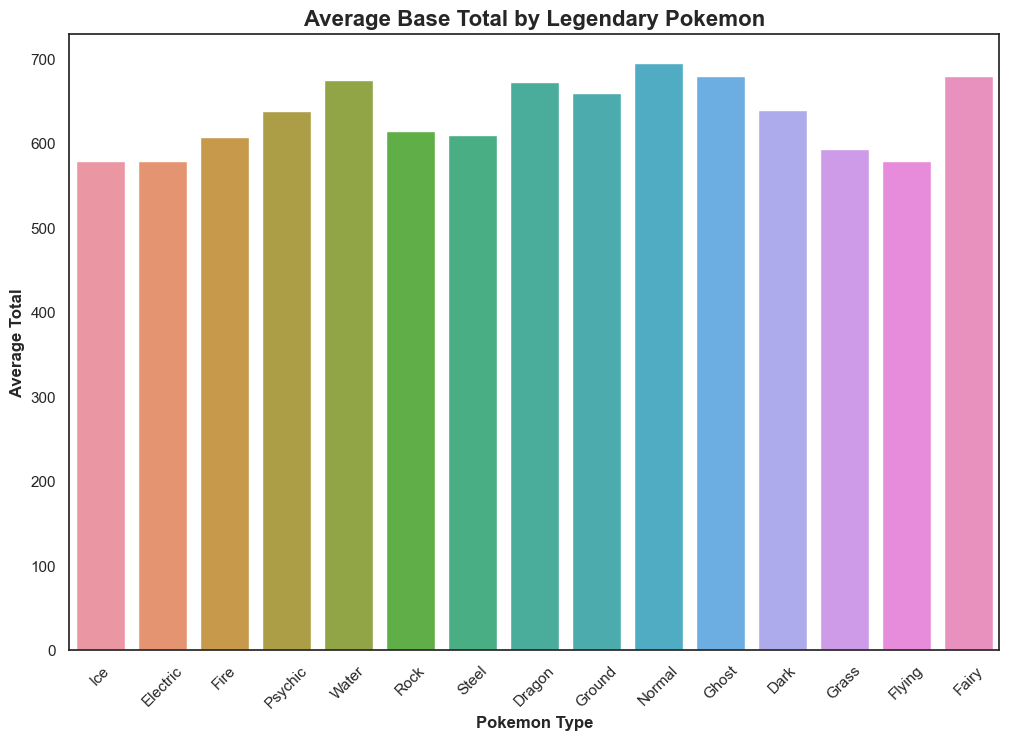

In [40]:
plt.figure(figsize = (12, 8))
sns.barplot(data = data_lengendary_pokemon, x = 'Type', y = 'Total', errorbar = None)
plt.ylabel('Average Total', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Base Total by Legendary Pokemon', fontsize = 16, weight = 'bold')

Text(0.5, 1.0, 'Average HP by Legendary Pokemon')

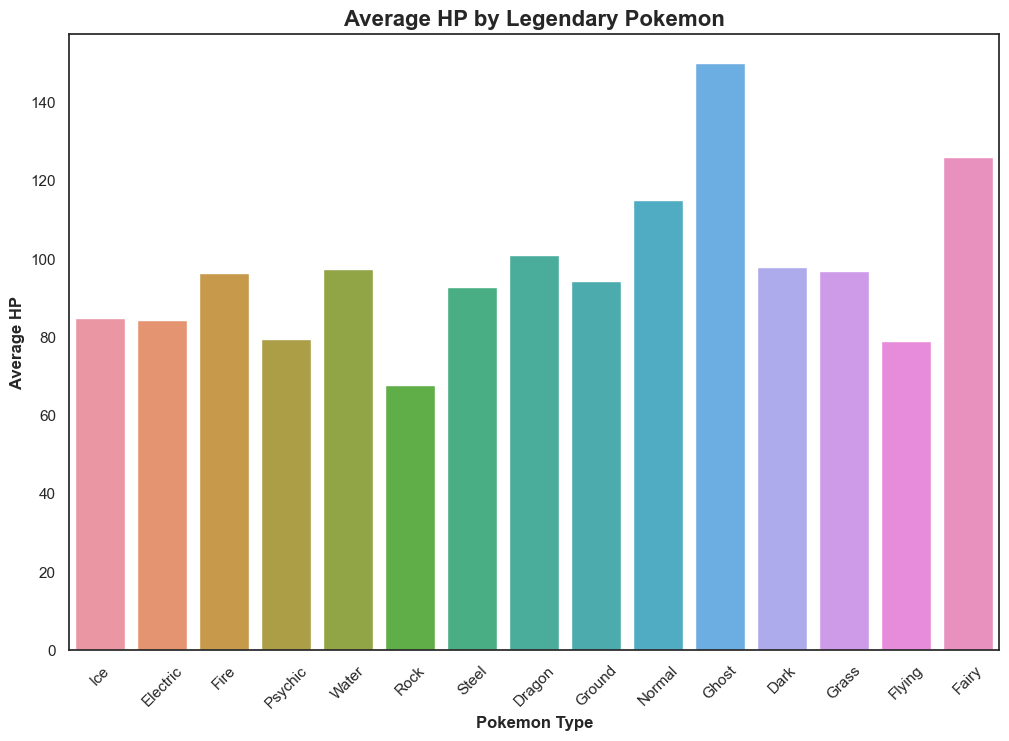

In [41]:
plt.figure(figsize = (12, 8))
sns.barplot(data = data_lengendary_pokemon, x = 'Type', y = 'HP', errorbar = None)
plt.ylabel('Average HP', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average HP by Legendary Pokemon', fontsize = 16, weight = 'bold')

Text(0.5, 1.0, 'Average Attack by Legendary Pokemon')

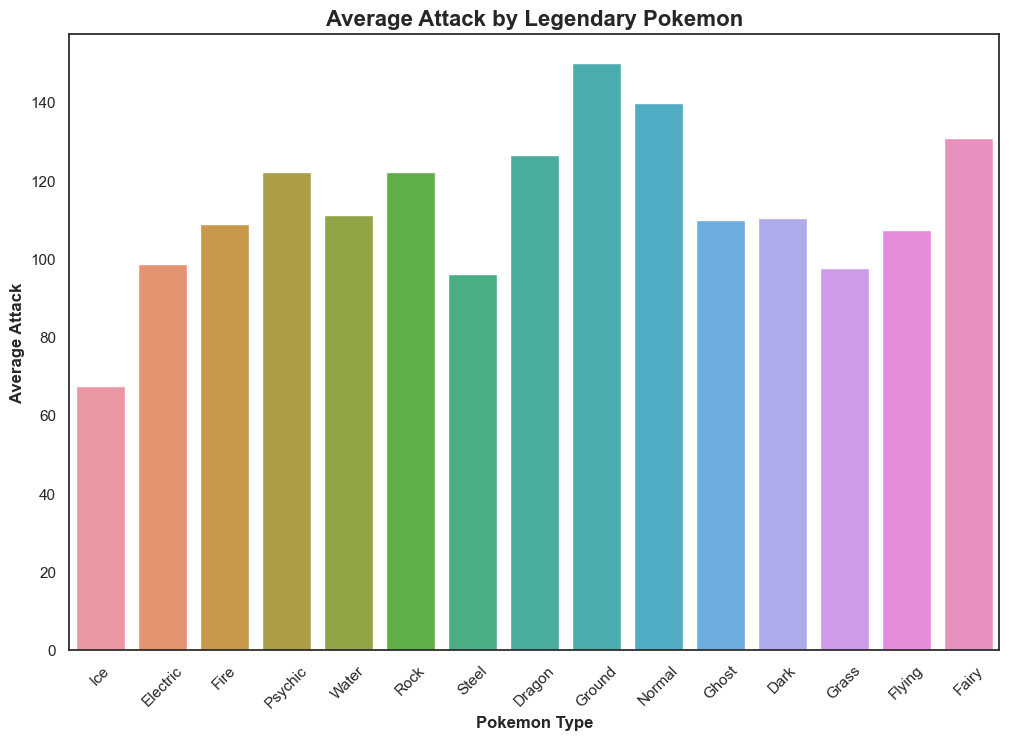

In [42]:
plt.figure(figsize = (12, 8))
sns.barplot(data = data_lengendary_pokemon, x = 'Type', y = 'Attack', errorbar = None)
plt.ylabel('Average Attack', weight = 'bold')
plt.xlabel('Pokemon Type', weight = 'bold')
plt.xticks(rotation = 45)
plt.title('Average Attack by Legendary Pokemon', fontsize = 16, weight = 'bold')

# Correlation Analysis

In [ ]:
numeric_attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [ ]:
correlation_matrix = data[numeric_attributes].corr()

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for Pokemon Attributes', fontsize = 16, weight = 'bold')
plt.show()

# 